### Paquetes a instalar

In [1]:
#pip install opencv-python

### Importando librerias para procesamiento de imagenes

In [2]:
#Importar Keras Sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import random
import cvlib as cv
import cv2
import os
import glob
import keras

##### Configurar parametros de nuestra red nueronal

In [3]:
EPOCS=100
LR=1 #1e-3
BATCH_SIZE = 16
IMG_DIMS=(96,96,3)
IMG_TOTAL_PIXELS=IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2]

In [4]:
data=[]
labels=[]

### Cargar imàgenes del dataset
#### Cargamos primero las imagenes de mujeres y su etiqueta de mujer
#### Cargamos las imagenes de hombres y su etiqueta de hombre

In [5]:
image_files_ages_0_2 = [f for f in glob.glob('Age/ages_ranges/__0and2__'+"/*/*",recursive=True) if not os.path.isdir(f)]
#image_files_ages_0_2

image_files_ages_4_6 = [f for f in glob.glob('Age/ages_ranges/__4and6__'+"/*/*",recursive=True) if not os.path.isdir(f)]
#image_files_ages_4_6

image_files_ages_8_12 = [f for f in glob.glob('Age/ages_ranges/__8and12__'+"/*/*",recursive=True) if not os.path.isdir(f)]
#image_files_ages_8_12

image_files_ages_15_20 = [f for f in glob.glob('Age/ages_ranges/__15and20__'+"/*/*",recursive=True) if not os.path.isdir(f)]
#image_files_ages_15_20

image_files_ages_25_32 = [f for f in glob.glob('Age/ages_ranges/__25and32__'+"/*/*",recursive=True) if not os.path.isdir(f)]
#image_files_ages_25_32

image_files_ages_38_43 = [f for f in glob.glob('Age/ages_ranges/__38and43__'+"/*",recursive=True) if not os.path.isdir(f)]
#image_files_ages_38_43

image_files_ages_48_53 = [f for f in glob.glob('Age/ages_ranges/__48and53__'+"/*",recursive=True) if not os.path.isdir(f)]
#image_files_ages_48_53

image_files_ages_60_100 = [f for f in glob.glob('Age/ages_ranges/__60and100__'+"/*",recursive=True) if not os.path.isdir(f)]
#image_files_ages_60_100

In [6]:
def categorizeImageFilesByNameFormat(image_files):
    #Age/UTKFace/part1\\100_1_0_20170110183726390.jpg
    file_name=image_files.split('\\')[1]
    #print ('file_name: ', file_name)
    age_format=file_name.split('_')[0]
    #print("Age detected ", age_format)
    return int(age_format)

In [7]:
def categorizeImageFilesByPathFormat(image_files):
    #Age/Kaggle/face_age\\001\\1118.png
    age_format_file=image_files.split('\\')[1]
    #print ('file_name: ', age_format_file)
    return int(age_format_file)

In [8]:
def roiCropImages(imageRaw):
    roiFace, confidence= cv.detect_face(imageRaw)
    for idx,f in enumerate(roiFace):
        
        # obtenemos los puntos de la esquina del rectangulo de la cara
        (startX,startY) = f[0],f[1]
        (endX,endY) = f[2],f[3]
        
        face_crop = np.copy(imageRaw[startY:endY,startX:endX]) #Recortamos la seccion de la cara identificada
        if ((face_crop.shape[0])<10 or (face_crop.shape[1])<10):
            continue
        return face_crop,True
    return [],False
    

In [9]:
def create_age_data(image_files,labels,data):
    for img in image_files:
        image=cv2.imread(img)
        #print("Image file",img)
        image,found= roiCropImages(image)
        if (found):
            #print(image)
            image = cv2.resize(image,(IMG_DIMS[0],IMG_DIMS[1]))
            image = img_to_array(image)
            data.append(image)
            if ('UTKFace' in img):
                labels.append(categorizeImageFilesByNameFormat(img))
            elif ('face_age' in img):
                labels.append(categorizeImageFilesByPathFormat(img))

In [10]:
def create_gender_data_by_label(image_files,labels,label,data):
    for img in image_files:
        image=cv2.imread(img)
        #print("Image file",img)
        image,found= roiCropImages(image)
        if (found):
            #print(image)
            image = cv2.resize(image,(IMG_DIMS[0],IMG_DIMS[1]))
            #image = cv2.Canny(img,100,200)
            image = img_to_array(image)
            data.append(image)
            labels.append(label)

In [11]:
#create_age_data(image_files_source_utk,labels,data)
#create_age_data(image_files_source_faceage,labels,data)
create_gender_data_by_label(image_files_ages_0_2,labels,'0_2',data) 
create_gender_data_by_label(image_files_ages_4_6,labels,'4_6',data) 
create_gender_data_by_label(image_files_ages_8_12,labels,'8_12',data) 
create_gender_data_by_label(image_files_ages_15_20,labels,'15_20',data) 
create_gender_data_by_label(image_files_ages_25_32,labels,'25_32',data) 
create_gender_data_by_label(image_files_ages_38_43,labels,'38_43',data) 
create_gender_data_by_label(image_files_ages_48_53,labels,'48_53',data) 
create_gender_data_by_label(image_files_ages_60_100,labels,'60_100',data) 


In [12]:
#data

In [13]:
#labels

### PRE PROCESAMIENTO

In [14]:
data = np.array(data,dtype="float")/255.0
#data = np.array(data)
#data=data / 255.0
labels = np.array(labels)
#data

In [15]:
labels

array(['0_2', '0_2', '0_2', ..., '60_100', '60_100', '60_100'],
      dtype='<U6')

In [16]:
labels.shape

(12539,)

In [17]:
len(labels)

12539

In [18]:
np.unique(labels)

array(['0_2', '15_20', '25_32', '38_43', '48_53', '4_6', '60_100', '8_12'],
      dtype='<U6')

In [19]:
data.shape

(12539, 96, 96, 3)

In [20]:
# Revolvemos las muestras con la herramienta sklearn.utils shuffle
from sklearn.utils import shuffle
data, labels = shuffle(data, labels)

In [21]:
labels

array(['4_6', '8_12', '60_100', ..., '25_32', '48_53', '60_100'],
      dtype='<U6')

In [22]:
data[1]

array([[[0.60392157, 0.6       , 0.7372549 ],
        [0.56862745, 0.57254902, 0.71764706],
        [0.55294118, 0.56470588, 0.71372549],
        ...,
        [0.1254902 , 0.12156863, 0.16470588],
        [0.10196078, 0.09803922, 0.14901961],
        [0.16862745, 0.17647059, 0.22745098]],

       [[0.61568627, 0.61568627, 0.77647059],
        [0.59215686, 0.6       , 0.76470588],
        [0.56078431, 0.58039216, 0.74509804],
        ...,
        [0.14117647, 0.13333333, 0.18823529],
        [0.13333333, 0.1372549 , 0.2       ],
        [0.23137255, 0.25098039, 0.31764706]],

       [[0.59607843, 0.61568627, 0.77647059],
        [0.58823529, 0.61568627, 0.77647059],
        [0.55686275, 0.58823529, 0.74509804],
        ...,
        [0.14509804, 0.14117647, 0.20392157],
        [0.16470588, 0.17647059, 0.25490196],
        [0.30196078, 0.32941176, 0.41568627]],

       ...,

       [[0.23529412, 0.25098039, 0.34509804],
        [0.23137255, 0.25098039, 0.33333333],
        [0.23137255, 0

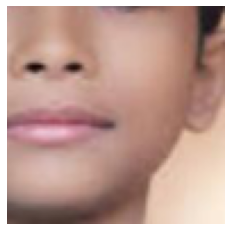

In [23]:
#Veamos la imagen #.astype('uint8')
test_image=np.array(data[1],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


### Dividir el dataset para el entrenamiento y la validaciòn

In [24]:
labels

array(['4_6', '8_12', '60_100', ..., '25_32', '48_53', '60_100'],
      dtype='<U6')

In [25]:
len(np.unique(labels))

8

In [26]:
#Tranformar las etiquetas 'man y 'woman' a enteros
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels

array([5, 7, 6, ..., 2, 4, 6], dtype=int64)

In [27]:
encoder.classes_

array(['0_2', '15_20', '25_32', '38_43', '48_53', '4_6', '60_100', '8_12'],
      dtype='<U6')

#### 0 - 0_2
#### 1 - 15_20
#### 2 - 25_32
#### 3 - 38_43
#### 4 - 48_53
#### 5 - 4_6
#### 6 - 60_100
#### 7 - 8_12

In [28]:
len(np.unique(labels))#Hay 8 clases

8

In [29]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [30]:
encoded_values = np.array(np.unique(labels))
encoded_values

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [31]:
(x_train,x_test,y_train,y_test) = train_test_split(data,labels,test_size=0.2,random_state=42)



In [32]:
j=0
for label in (np.unique(labels)) :
    found = False
    print("Label " , label)
    while (not found):
        #print("y_train ", y_train[j])
        if (y_train[j]==label):
            found=True
            print("Label example", j)
        j=j+1

Label  0
Label example 0
Label  1
Label example 33
Label  2
Label example 39
Label  3
Label example 110
Label  4
Label example 137
Label  5
Label example 140
Label  6
Label example 146
Label  7
Label example 149


In [33]:
y_train = keras.utils.to_categorical(y_train,len(np.unique(labels)))
y_test = keras.utils.to_categorical(y_test,len(np.unique(labels)))

In [34]:
y_train.min() ## Tenemos en el entrenamiento la etiqueta mìnima 0

0.0

In [35]:
y_train.max() ## Tenemos en el entrenamiento la etiqueta mìnima 1

1.0

In [36]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

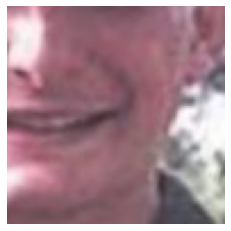

In [38]:
#Veamos una imagen del x_train #.astype('uint8')
x_train_image=np.array(x_train[100],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()


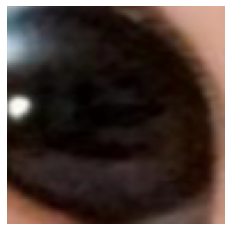

In [39]:
#Veamos una imagen del x_test #.astype('uint8')
x_train_image=np.array(x_test[100],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()


In [40]:
x_test.shape

(2508, 96, 96, 3)

In [41]:
#Hacemos reshape al array RGB para tener un solo array que represente la imagen
x_train.shape
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_train[1]

x_test.shape
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
x_test[1]


array([0.47843137, 0.58039216, 0.81960784, ..., 0.39215686, 0.52941176,
       0.78823529])

In [42]:
x_train.shape

(10031, 27648)

In [43]:
x_test.shape

(2508, 27648)

In [44]:
#Escalaciòn de los valores
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-0.5,0.5))

In [45]:
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.fit_transform(x_test)

In [46]:
x_train_sc.shape

(10031, 27648)

In [47]:
x_test_sc.shape

(2508, 27648)

## MODELADO

In [48]:
def buildModelSimple(dimInputs,entryLayerNeurons):
    model = Sequential()

    model.add(Dense (input_dim=dimInputs,units=entryLayerNeurons,activation='relu'))
    model.add(Dense (input_dim=np.unique(labels)/2,units=entryLayerNeurons/2,activation='relu'))
    model.add(Dense (input_dim=np.unique(labels)/2,units=entryLayerNeurons/4,activation='relu'))
    model.add(Dense(units=len(np.unique(labels)),activation='softmax'))
    
    return model

In [49]:
def buildModel(width,height,depth,classes):
    model= Sequential()
    inputShape = (height,width,depth)
    chanDim=-1
    
    if (K.image_data_format() == "channels_first"): #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


In [50]:
x_test_sc.shape

(2508, 27648)

In [51]:
# build model
#model = buildModel(width=IMG_DIMS[0], height=IMG_DIMS[1], depth=IMG_DIMS[2],classes=2)
#opt = Adam(lr=LR, decay=LR/EPOCS)
#model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

model = buildModelSimple(x_test_sc.shape[1],60)
# compile the model
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=LR),metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=LR),metrics=['accuracy'])


### Entrenar el modelo

In [52]:
x_train_sc

array([[-0.38235294, -0.38235294, -0.32745098, ...,  0.44509804,
        -0.28039216, -0.33529412],
       [-0.03333333,  0.06862745,  0.3       , ..., -0.30784314,
         0.07647059,  0.26470588],
       [ 0.06862745,  0.05686275,  0.02941176, ...,  0.08431373,
        -0.10392157,  0.17058824],
       ...,
       [ 0.10784314,  0.12745098,  0.1627451 , ..., -0.07254902,
        -0.17058824,  0.49607843],
       [-0.2372549 , -0.10392157, -0.20196078, ...,  0.00980392,
         0.01764706,  0.15490196],
       [-0.30392157, -0.23333333,  0.11176471, ..., -0.06862745,
         0.1       ,  0.3745098 ]])

In [53]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
x_test_sc

array([[-0.26862745, -0.12745098,  0.06862745, ..., -0.11176471,
        -0.04901961,  0.12745098],
       [-0.02156863,  0.08039216,  0.31960784, ..., -0.10784314,
         0.02941176,  0.28823529],
       [-0.45686275, -0.44509804, -0.41372549, ...,  0.5       ,
         0.5       ,  0.5       ],
       ...,
       [-0.06078431, -0.11568627, -0.04509804, ..., -0.44117647,
        -0.37843137, -0.40588235],
       [-0.22941176, -0.11568627,  0.08431373, ..., -0.38235294,
        -0.3       , -0.37843137],
       [-0.24509804, -0.20588235, -0.10392157, ..., -0.4372549 ,
        -0.44117647, -0.4254902 ]])

In [55]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [56]:
x_train_sc.shape

(10031, 27648)

In [57]:
x_train_sc.shape[0]

10031

In [58]:
y_train.shape

(10031, 8)

In [59]:
x_test.shape

(2508, 27648)

In [ ]:
# train the model
#x_train_sc_extended=x_train_sc.reshape(x_train_sc.shape[0],IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
#x_test_extended=x_test.reshape(x_test.shape[0],IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])

#history = model.fit_generator(aug.flow(x_train_sc_extended, y_train, batch_size=BATCH_SIZE), 
#                              validation_data=(x_test_extended,y_test),
#                              steps_per_epoch=len(x_train_sc_extended),
#                              epochs=EPOCS, verbose=1)

history=model.fit(x_train_sc,y_train,epochs=EPOCS,batch_size=BATCH_SIZE)

Epoch 1/100
627/627 [==============================] - 9s 11ms/step - loss: 0.0962 - accuracy: 0.3750
Epoch 2/100
627/627 [==============================] - 7s 11ms/step - loss: 0.0832 - accuracy: 0.4676
Epoch 3/100
627/627 [==============================] - 7s 10ms/step - loss: 0.0781 - accuracy: 0.5011
Epoch 4/100
627/627 [==============================] - 6s 10ms/step - loss: 0.0751 - accuracy: 0.5225
Epoch 5/100
627/627 [==============================] - 7s 11ms/step - loss: 0.0735 - accuracy: 0.5293
Epoch 6/100
627/627 [==============================] - 6s 10ms/step - loss: 0.0725 - accuracy: 0.5402
Epoch 7/100
627/627 [==============================] - 6s 10ms/step - loss: 0.0693 - accuracy: 0.5651
Epoch 8/100
627/627 [==============================] - 6s 10ms/step - loss: 0.0684 - accuracy: 0.5689
Epoch 9/100
627/627 [==============================] - 6s 10ms/step - loss: 0.0671 - accuracy: 0.5714
Epoch 10/100
627/627 [==============================] - 6s 10ms/step - loss: 0.066

### Visualizaciòn de la clasificaciòn

In [ ]:
##Visualizacion de la clasificaciòn
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.title('Entrenamiento Clasificacion Genero')
plt.xlabel('Epocas')
plt.legend(loc='upper left')
plt.show()

### Salvar el modelo

In [ ]:

# save the model to disk
model.save('age_detection.model')


# save plot to disk
plt.savefig('plot.png')

###### Review following video:
https://www.youtube.com/watch?v=WOuAI5DhHyU

### Evaluar el modelo

In [ ]:
#Evaluar el modelo
model.evaluate(x_test_sc,y_test,verbose=1)

### Predecir

In [ ]:
def predictAgeRange(testToPredict):
    toint=(model.predict(testToPredict)).round()
    int_test=toint.astype('int')
    categoria_predecida = int_test.argmax()
    return categoria_predecida


In [ ]:
#Imagen a predecir
imgToPredict=x_test[2].reshape(IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
x_train_image=np.array(imgToPredict,dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
y_test[2]

In [ ]:
x_test[102].shape

In [ ]:
testToPredict=x_test[2].reshape(1,IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2])
testToPredict.shape

In [ ]:
(model.predict(testToPredict)).round()

In [ ]:
encoder.classes_[0]

In [ ]:
predictAgeRange(testToPredict)

In [ ]:
print ("El rango de edad predecida es : ", encoder.classes_[predictAgeRange(testToPredict)])

In [ ]:
i = int(0)
for testToPredict in (x_test):
    imgToPredict=x_test[i].reshape(IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
    x_train_image=np.array(imgToPredict,dtype='float32')
    plt.axis("off")
    plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    testToPredict=x_test[i].reshape(1,IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2])
    print ("La categoria predecida es : ", encoder.classes_[predictAgeRange(testToPredict)])
    #time.sleep(2000)
    i=i+1